In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.layers.experimental.preprocessing import Resizing
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Багатошарова нейронна мережа

In [ ]:
from keras.datasets import fashion_mnist


# Завантаження даних
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Передобробка даних
x_train = x_train.reshape(x_train.shape[0], 28 * 28).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28 * 28).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Створення моделі
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Компіляція моделі
history = model.fit(x_train, y_train,
                    batch_size=128, epochs=20,
                    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 6s 6ms/step - loss: 0.7400 - accuracy: 0.7464 - val_loss: 0.4520 - val_accuracy: 0.8355
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.5087 - accuracy: 0.8196 - val_loss: 0.4520 - val_accuracy: 0.8324
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4707 - accuracy: 0.8348 - val_loss: 0.4611 - val_accuracy: 0.8322
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4487 - accuracy: 0.8412 - val_loss: 0.4194 - val_accuracy: 0.8465
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4322 - accuracy: 0.8457 - val_loss: 0.3862 - val_accuracy: 0.8607
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.4194 - accuracy: 0.8503 - val_loss: 0.4065 - val_accuracy: 0.8489
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4125 - accuracy: 0.8517 - val_loss: 0.3898 - val_accuracy: 0.8608
Epoch 

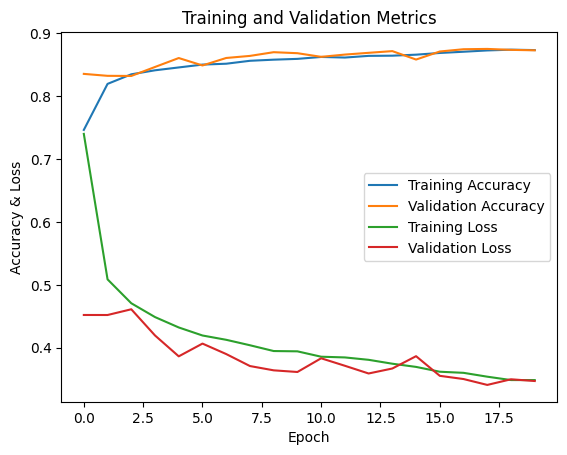

In [ ]:
# Побудова графіка
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy & Loss')
plt.title('Training and Validation Metrics')
plt.legend()
plt.show()

In [ ]:
# Оцінка точності
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8730000257492065


# 2. Згорткова нейронна мережа Conv2D

In [ ]:
# Завантаження даних
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Передобробка даних
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Створення моделі
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Компіляція моделі
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Навчання моделі
history = model.fit(x_train, y_train,
                    batch_size=128, epochs=20,
                    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 10s 14ms/step - loss: 0.4299 - accuracy: 0.8506 - val_loss: 0.9025 - val_accuracy: 0.7323
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.2828 - accuracy: 0.8992 - val_loss: 0.2636 - val_accuracy: 0.9047
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.2364 - accuracy: 0.9159 - val_loss: 0.2387 - val_accuracy: 0.9119
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.2075 - accuracy: 0.9244 - val_loss: 0.2491 - val_accuracy: 0.9099
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1886 - accuracy: 0.9317 - val_loss: 0.2221 - val_accuracy: 0.9226
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1698 - accuracy: 0.9386 - val_loss: 0.2310 - val_accuracy: 0.9172
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1517 - accuracy: 0.9447 - val_loss: 0.2178 - val_accuracy: 0.921

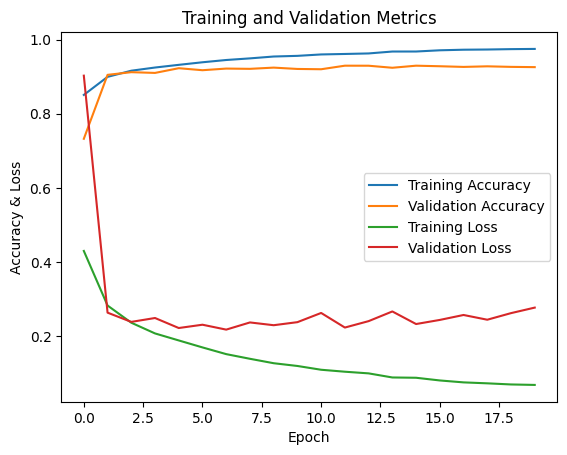

In [ ]:
# Побудова графіка
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy & Loss')
plt.title('Training and Validation Metrics')
plt.legend()
plt.show()

In [ ]:
# Оцінка точності
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9254999756813049


# 3. Згорткова нейронна мережа VGG16

In [ ]:
# Завантаження даних
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = np.stack([x_train] * 3, axis=-1)
x_test = np.stack([x_test] * 3, axis=-1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

resizing_layer = Resizing(32, 32)
x_train_resized = resizing_layer(x_train)
x_test_resized = resizing_layer(x_test)

# Створюємо модель VGG16
base_model = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(32, 32, 3),
    pooling='avg'
)

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# Компиляция модели
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Навчання моделі
history = model.fit(x_train_resized, y_train, batch_size=128, epochs=20, validation_data=(x_test_resized, y_test))

Epoch 1/20
469/469 [==============================] - 30s 57ms/step - loss: 0.9149 - accuracy: 0.6445 - val_loss: 0.4823 - val_accuracy: 0.8354
Epoch 2/20
469/469 [==============================] - 26s 56ms/step - loss: 0.3799 - accuracy: 0.8725 - val_loss: 0.3283 - val_accuracy: 0.8869
Epoch 3/20
469/469 [==============================] - 26s 55ms/step - loss: 0.2867 - accuracy: 0.9019 - val_loss: 0.2847 - val_accuracy: 0.9039
Epoch 4/20
469/469 [==============================] - 26s 55ms/step - loss: 0.2401 - accuracy: 0.9176 - val_loss: 0.2778 - val_accuracy: 0.9015
Epoch 5/20
469/469 [==============================] - 26s 55ms/step - loss: 0.2254 - accuracy: 0.9226 - val_loss: 0.2567 - val_accuracy: 0.9103
Epoch 6/20
469/469 [==============================] - 26s 55ms/step - loss: 0.1944 - accuracy: 0.9330 - val_loss: 0.2367 - val_accuracy: 0.9216
Epoch 7/20
469/469 [==============================] - 26s 55ms/step - loss: 0.1811 - accuracy: 0.9374 - val_loss: 0.2540 - val_accuracy:

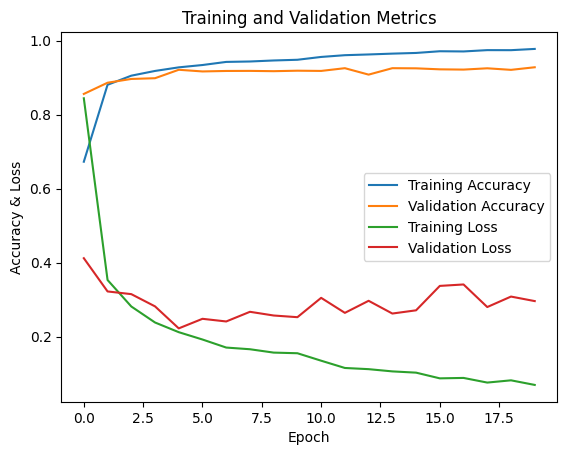

In [ ]:
# Побудова графіка
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy & Loss')
plt.title('Training and Validation Metrics')
plt.legend()
plt.show()

In [ ]:
# Оцінка точності
test_loss, test_accuracy = model.evaluate(x_test_resized, y_test, verbose=0)
print('Test accuracy:', test_accuracy)

Test accuracy: 0.9280999898910522


**Висновок:**  Точність отриманих згорткових мереж (93%) більше, ніж точність багатошарової мережі (87%), але виконання згорткової мережи займає більше часу та потребує більше ресурсів.